In [2]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [3]:
morpho_example_wide = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Wide.csv")

Wide = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_wide,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    format = "wide"
)

print(Wide.df)
print(Wide.format)
print(Wide.chemical)
print(Wide.plate)
print(Wide.well)
print(Wide.concentration)
print(Wide.endpoint)
print(Wide.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
wide
chemical.id
plate.id
well
conc
endpoint
value


In [4]:
morpho_example_long = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_long,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    endpoint = "endpoint",
    value = "value"
)

print(Long.df)
print(Long.format)
print(Long.chemical)
print(Long.plate)
print(Long.well)
print(Long.concentration)
print(Long.endpoint)
print(Long.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
long
chemical.id
plate.id
well
conc
endpoint
value


## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [5]:
endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], "DAVID":["MO24", "DP24"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"Test":["MO24"], "DAVID":["DP24"]})

Long.df

DAVID is already an existing endpoint


,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,Test,1.0
860,3863,10.0,20637,H09,Test,1.0
861,3863,10.0,20637,H10,Test,0.0
862,3863,10.0,20637,H11,Test,0.0


In [6]:
Long.report_combination

{'Test': ['MO24'],
 'DAVID': ['MO24', 'DP24'],
 'ANY24': ['MO24', 'DP24', 'SM24', 'NC24']}

In [7]:
Long.df[Long.df[Long.endpoint] == "DAVID"]

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,DAVID,0.0
1,3757,0.0,19877,H02,DAVID,0.0
2,3757,0.0,19877,H03,DAVID,0.0
3,3757,0.0,19877,H04,DAVID,0.0
4,3757,0.0,19877,H05,DAVID,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,DAVID,1.0
860,3863,10.0,20637,H09,DAVID,1.0
861,3863,10.0,20637,H10,DAVID,0.0
862,3863,10.0,20637,H11,DAVID,0.0


In [8]:
# Add new endpoint
Wide.combine_and_create_new_endpoints(endpoint_dict)

Wide.df

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,DAVID,1.0
860,3863,10.0,20637,H09,DAVID,1.0
861,3863,10.0,20637,H10,DAVID,0.0
862,3863,10.0,20637,H11,DAVID,0.0


#### Binary Class: Set wells to NA

In [9]:
Long.set_well_to_na(endpoint_name = "DNC_", endpoint_value = 1)

# All of these wells should be NA 
Long.df[Long.df["bmdrc.Well.ID"] == "3757 21.9 19877 B01"]


,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
216,3757,21.9,19877,B01,MO24,NaN,3757 21.9 19877 B01
1080,3757,21.9,19877,B01,DP24,NaN,3757 21.9 19877 B01
1944,3757,21.9,19877,B01,SM24,NaN,3757 21.9 19877 B01
2808,3757,21.9,19877,B01,NC24,NaN,3757 21.9 19877 B01
3672,3757,21.9,19877,B01,MORT,NaN,3757 21.9 19877 B01
4536,3757,21.9,19877,B01,YSE_,NaN,3757 21.9 19877 B01
5400,3757,21.9,19877,B01,AXIS,NaN,3757 21.9 19877 B01
6264,3757,21.9,19877,B01,EYE_,NaN,3757 21.9 19877 B01
7128,3757,21.9,19877,B01,SNOU,NaN,3757 21.9 19877 B01
7992,3757,21.9,19877,B01,JAW_,NaN,3757 21.9 19877 B01


In [10]:
Long.set_well_to_na(endpoint_name = "MORT", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

# All but DP24, MO24, SM24, and MORT should be np.nan
Long.df[Long.df["bmdrc.Well.ID"] == "3757 2.65 19890 G04"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
63,3757,2.65,19890,G04,MO24,0.0,3757 2.65 19890 G04
927,3757,2.65,19890,G04,DP24,1.0,3757 2.65 19890 G04
1791,3757,2.65,19890,G04,SM24,0.0,3757 2.65 19890 G04
2655,3757,2.65,19890,G04,NC24,NaN,3757 2.65 19890 G04
3519,3757,2.65,19890,G04,MORT,1.0,3757 2.65 19890 G04
4383,3757,2.65,19890,G04,YSE_,NaN,3757 2.65 19890 G04
5247,3757,2.65,19890,G04,AXIS,NaN,3757 2.65 19890 G04
6111,3757,2.65,19890,G04,EYE_,NaN,3757 2.65 19890 G04
6975,3757,2.65,19890,G04,SNOU,NaN,3757 2.65 19890 G04
7839,3757,2.65,19890,G04,JAW_,NaN,3757 2.65 19890 G04


In [11]:
Long.report_well_na

[[['DNC_'], [1], None], [['MORT'], [1], ['DP24', 'MO24', 'SM24', 'MORT']]]

#### Binary Class: Remove Endpoint

In [12]:
# Should trigger an error
#Long.remove_endpoints(["DNC_", "CATS"])

In [13]:
# DNC_ should not be removed
Long.df[Long.df[Long.endpoint] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
19008,3757,0.0,19877,H01,DNC_,0.0,3757 0.0 19877 H01
19009,3757,0.0,19877,H02,DNC_,0.0,3757 0.0 19877 H02
19010,3757,0.0,19877,H03,DNC_,0.0,3757 0.0 19877 H03
19011,3757,0.0,19877,H04,DNC_,0.0,3757 0.0 19877 H04
19012,3757,0.0,19877,H05,DNC_,0.0,3757 0.0 19877 H05
...,...,...,...,...,...,...,...
19867,3863,10.0,20637,H08,DNC_,0.0,3863 10.0 20637 H08
19868,3863,10.0,20637,H09,DNC_,0.0,3863 10.0 20637 H09
19869,3863,10.0,20637,H10,DNC_,0.0,3863 10.0 20637 H10
19870,3863,10.0,20637,H11,DNC_,0.0,3863 10.0 20637 H11


In [14]:
Long.remove_endpoints("DNC_")

Long.df[Long.df["endpoint"] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID


In [15]:
Long.report_endpoint_removal

['DNC_']

In [21]:
Long.remove_endpoints(["DAVID", "Test"])

Long.df[Long.df["endpoint"].isin(["DAVID", "Test"])]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID


In [22]:
Long.report_endpoint_removal

['DNC_', 'TR__', 'BRAI', 'DAVID', 'Test']

## Module 3: Filtering Modules

In [34]:
Long.plate_groups["bmdrc.filter"] = False
Long.plate_groups["bmdrc.filter.reason"] = ""

Long.plate_groups


,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,False,
1,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,False,
2,3757,0.0,19877,CFIN,12,12,0.0,3757 19877 CFIN,False,
3,3757,0.0,19877,CIRC,12,12,0.0,3757 19877 CIRC,False,
4,3757,0.0,19877,DAVID,12,12,0.0,3757 19877 DAVID,False,
...,...,...,...,...,...,...,...,...,...,...
1651,3863,10.0,20637,SOMI,12,6,0.0,3863 20637 SOMI,False,
1652,3863,10.0,20637,SWIM,12,6,0.0,3863 20637 SWIM,False,
1653,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,False,
1654,3863,10.0,20637,Test,12,8,2.0,3863 20637 Test,False,


In [111]:
NegControls = Long.plate_groups[Long.plate_groups[Long.concentration] == 0]

NegControlRes = pd.DataFrame((NegControls["bmdrc.num.affected"] / NegControls["bmdrc.num.nonna"])).value_counts().rename_axis("Response").reset_index().rename(columns = {0:"Count"}).sort_values(by = ["Response"]).reset_index(drop=True)
NegControlRes["Filter"] = "Keep"
NegControlRes.loc[NegControlRes["Response"] > 0.5, "Filter"] = "Filter"
NegControlRes 

,Response,Count,Filter
0,0.000000,169,Keep
1,0.083333,17,Keep
2,0.090909,14,Keep
3,0.100000,2,Keep
4,0.166667,3,Keep
5,0.181818,2,Keep


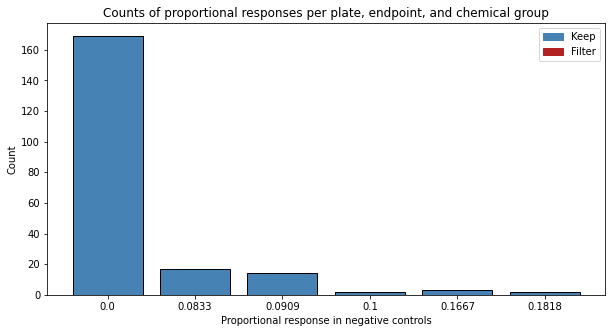

In [112]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (10, 5))

colors = {'Keep':'steelblue', 'Filter':'firebrick'}
color_choices = NegControlRes["Filter"].apply(lambda x: colors[x])
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.bar(x = [x for x in range(len(NegControlRes))], height = NegControlRes["Count"], 
        edgecolor = "black", tick_label = np.round(NegControlRes["Response"], 4),
        color = color_choices, label = colors)
plt.title("Counts of proportional responses per plate, endpoint, and chemical group")
plt.xlabel("Proportional response in negative controls")
plt.ylabel("Count")
plt.legend(handles, labels)

False

In [58]:
[x for x in range(len(PlateMissingness))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]